In [1]:
import pandas as pd
population_data = pd.read_csv('population_data.csv')
population_data.head()

,STATISTIC Label,Year,Component,UNIT,VALUE
0,Annual Population Change,1951,Annual births,Thousand,NaN
1,Annual Population Change,1951,Annual deaths,Thousand,NaN
2,Annual Population Change,1951,Natural increase,Thousand,26.6
3,Annual Population Change,1951,Immigrants,Thousand,NaN
4,Annual Population Change,1951,Emigrants,Thousand,NaN


## EDA

In [2]:
# Data Cleaning: Handling missing values

# Checking the amount of missing data in the 'VALUE' column
missing_values = population_data['VALUE'].isnull().sum()
value_statistics = population_data['VALUE'].describe()
population_data_filled = population_data.fillna(value_statistics['mean'])

# Re-check if any missing values remain
missing_values_filled = population_data_filled['VALUE'].isnull().sum()

missing_values, value_statistics, missing_values_filled


(144,
 count     440.000000
 mean      633.262273
 std      1378.671718
 min       -58.000000
 25%        24.775000
 50%        35.550000
 75%        70.775000
 max      5281.600000
 Name: VALUE, dtype: float64,
 0)

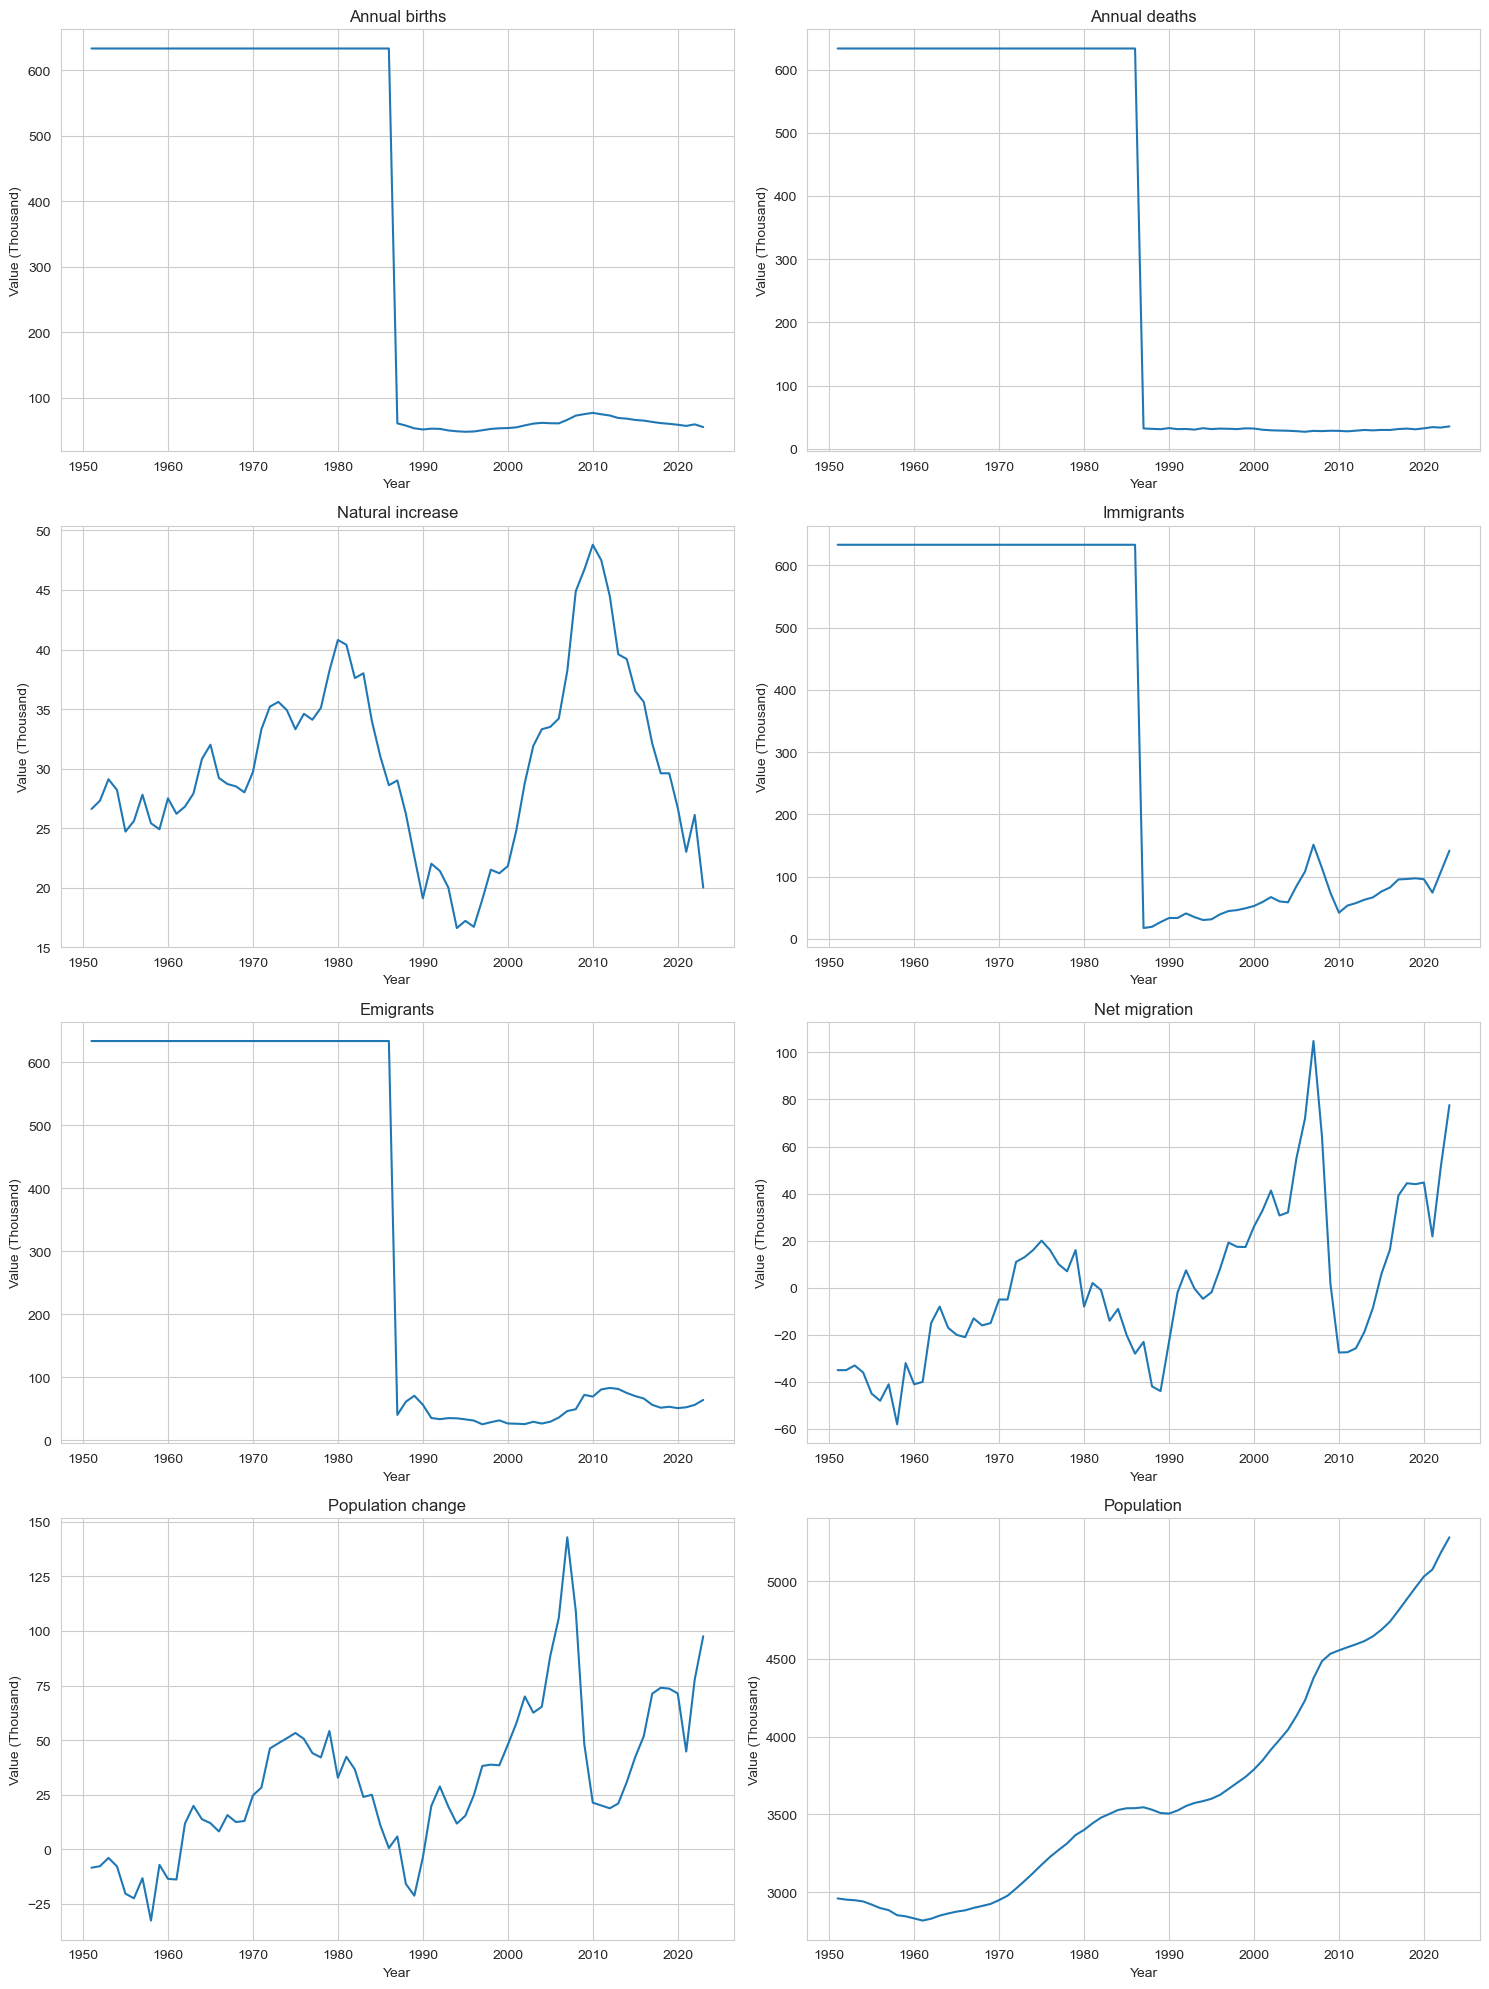

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# Create a time series plot for each Component of population change
components = population_data_filled['Component'].unique()
num_components = len(components)
num_rows = (num_components + 1) // 2 
plt.figure(figsize=(15, num_rows * 5))

for index, component in enumerate(components, 1):
    plt.subplot(num_rows, 2, index)
    component_data = population_data_filled[population_data_filled['Component'] == component]
    sns.lineplot(data=component_data, x='Year', y='VALUE')
    plt.title(component)
    plt.ylabel('Value (Thousand)')
    plt.tight_layout()
plt.show()

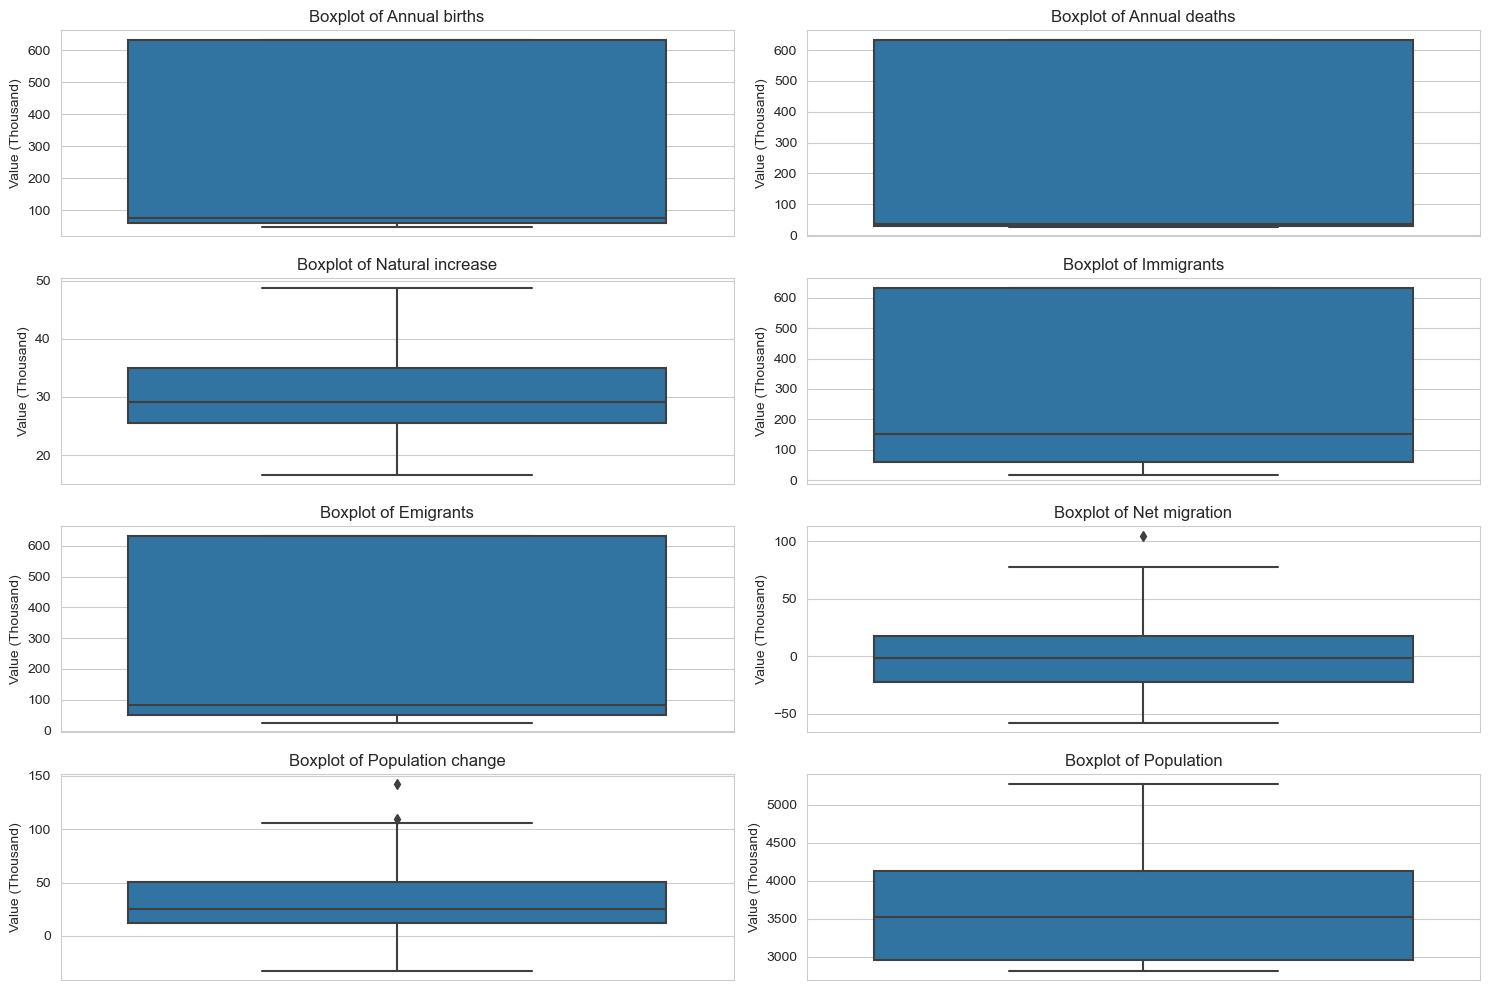

,count,mean,std,min,25%,50%,75%,max
Component,,,,,,,,
Annual births,73.0,342.758107,288.591191,48.4,59.7,77.2,633.262273,633.262273
Annual deaths,73.0,327.829340,303.365392,27.0,31.0,35.5,633.262273,633.262273
Emigrants,73.0,336.855367,294.688476,25.3,49.2,83.0,633.262273,633.262273
Immigrants,73.0,345.444408,286.801100,17.2,59.0,151.1,633.262273,633.262273
Natural increase,73.0,30.260274,7.447385,16.6,25.6,29.1,34.900000,48.800000
Net migration,73.0,1.078082,32.866465,-58.0,-22.9,-2.0,17.400000,104.800000
Population,73.0,3650.532877,719.507144,2818.3,2952.9,3529.0,4133.800000,5281.600000
Population change,73.0,31.339726,34.295115,-32.6,11.8,25.0,50.600000,142.900000


In [4]:
# Summarising the components statistically
component_summary = population_data_filled.groupby('Component')['VALUE'].describe()

# Analyzing correlations between different components
pivot_data = population_data_filled.pivot_table(values='VALUE', index='Year', columns='Component', aggfunc='mean')
correlation_matrix = pivot_data.corr()

# Identifying any potential outliers or anomalies
plt.figure(figsize=(15, 10))

for index, component in enumerate(components, 1):
    plt.subplot(num_rows, 2, index)
    sns.boxplot(data=population_data_filled[population_data_filled['Component'] == component], y='VALUE')
    plt.title(f'Boxplot of {component}')
    plt.ylabel('Value (Thousand)')

plt.tight_layout()
plt.show()

component_summary

Annual births, deaths, emigrants, and immigrants have been imputed with the mean value due to missing data, leading to identical statistics for these categories. They all have the same mean (approximately 633.26 thousand) due to the imputation strategy.
Natural increase varies with a mean of approximately 30.26 thousand and a relatively small standard deviation, indicating less variability compared to other components.
Net migration has a mean close to zero but a large standard deviation, which might indicate years of high immigration offset by years of high emigration.
Population shows a significant mean of approximately 3650.53 thousand, with a standard deviation indicating variability over time.
Population change has a mean of approximately 31.34 thousand, also indicating variability in how much the population changes year-to-year.

The boxplots for each component aimed to identify potential outliers or anomalies, but since some of the components have all values imputed with the mean, the boxplots will not be informative for those components.

In [5]:
correlation_matrix

Component,Annual births,Annual deaths,Emigrants,Immigrants,Natural increase,Net migration,Population,Population change
Component,,,,,,,,
Annual births,1.000000,0.999736,0.999408,0.997125,0.129497,-0.492758,-0.782252,-0.444149
Annual deaths,0.999736,1.000000,0.998978,0.996696,0.108912,-0.492678,-0.788884,-0.448543
Emigrants,0.999408,0.998978,1.000000,0.996366,0.135846,-0.504504,-0.773832,-0.454017
Immigrants,0.997125,0.996696,0.996366,1.000000,0.135467,-0.439677,-0.751879,-0.391996
Natural increase,0.129497,0.108912,0.135846,0.135467,1.000000,0.083577,0.238297,0.297256
Net migration,-0.492758,-0.492678,-0.504504,-0.439677,0.083577,1.000000,0.611956,0.976300
Population,-0.782252,-0.788884,-0.773832,-0.751879,0.238297,0.611956,1.000000,0.638276
Population change,-0.444149,-0.448543,-0.454017,-0.391996,0.297256,0.976300,0.638276,1.000000


High positive correlations between annual births, deaths, emigrants, and immigrants, which is expected since these values were imputed with the mean and are not representative of their true variation.
Natural increase has a low correlation with other components, suggesting it may be independent of factors like emigration and immigration.

Net migration has a very high positive correlation with population change, which makes sense since net migration directly affects population change.

Population size has a moderate positive correlation with net migration and population change, indicating that larger populations may experience higher net migration and changes.

## Adressing Outliers

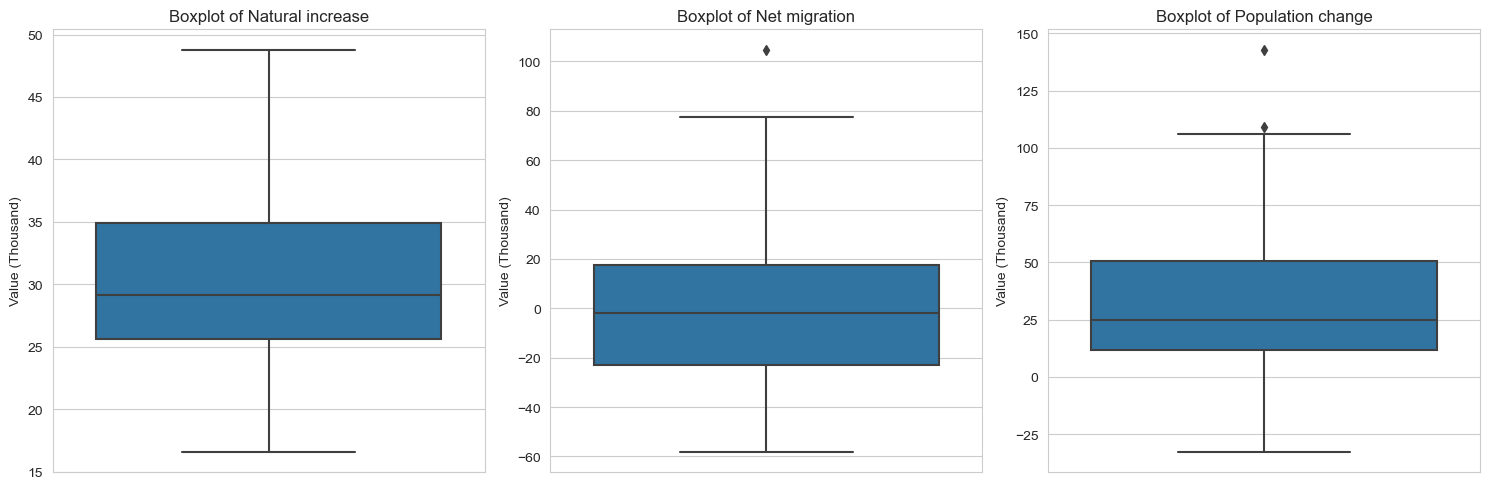

/var/folders/nc/3_jdz57s3fb248nc5jbmskj40000gn/T/ipykernel_87353/3156399032.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append({
/var/folders/nc/3_jdz57s3fb248nc5jbmskj40000gn/T/ipykernel_87353/3156399032.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append({
/var/folders/nc/3_jdz57s3fb248nc5jbmskj40000gn/T/ipykernel_87353/3156399032.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append({


,Lower_Bound,Upper_Bound,Outliers
Component,,,
Natural increase,11.65,48.85,"Empty DataFrame Columns: [Year, VALUE] Index: []"
Net migration,-83.35,77.85,Year VALUE 453 2007 104.8
Population change,-46.40,108.80,Year VALUE 454 2007 142.9 462 2008 1...


In [6]:
# To address potential outliers look at the components variability.
variable_components = ['Natural increase', 'Net migration', 'Population change']

plt.figure(figsize=(15, 5))
for index, component in enumerate(variable_components, 1):
    plt.subplot(1, len(variable_components), index)
    sns.boxplot(data=population_data_filled[population_data_filled['Component'] == component], y='VALUE')
    plt.title(f'Boxplot of {component}')
    plt.ylabel('Value (Thousand)')

plt.tight_layout()
plt.show()

# Calculating IQR for each component
outliers_df = pd.DataFrame(columns=['Component', 'Lower_Bound', 'Upper_Bound', 'Outliers'])

for component in variable_components:
    component_data = population_data_filled[population_data_filled['Component'] == component]
    Q1 = component_data['VALUE'].quantile(0.25)
    Q3 = component_data['VALUE'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = component_data[(component_data['VALUE'] < lower_bound) | (component_data['VALUE'] > upper_bound)]
    outliers_df = outliers_df.append({
        'Component': component,
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound,
        'Outliers': outliers[['Year', 'VALUE']]
    }, ignore_index=True)

outliers_df.set_index('Component', inplace=True)
outliers_df

Natural increase: No outliers were detected using the IQR method.

Net migration: One outlier was detected in the year 2007 with a value of 104.8 thousand.

Population change: There are outliers, with the most notable being in 2007 with a value of 142.9 thousand.

These outliers are values that lie outside the typical range (1.5 times the IQR below the first quartile or above the third quartile).

## Feature Engineering

In [7]:
# Feature Engineering creates a year-over-year growth rate feature for population
population_data_growth = population_data_filled[population_data_filled['Component'] == 'Population']

# Calculate the year-over-year growth rate
population_data_growth = population_data_growth.sort_values('Year')
population_data_growth['Growth_Rate'] = population_data_growth['VALUE'].pct_change() * 100
population_data_filled = population_data_filled.merge(population_data_growth[['Year', 'Growth_Rate']], on='Year', how='left')
population_data_filled.head()

# Check the correlation of the growth rate with other features
growth_rate_correlation = population_data_filled.corr()['Growth_Rate'].sort_values()

growth_rate_correlation, population_data_growth[['Year', 'VALUE', 'Growth_Rate']].head()

/var/folders/nc/3_jdz57s3fb248nc5jbmskj40000gn/T/ipykernel_87353/3992394692.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  growth_rate_correlation = population_data_filled.corr()['Growth_Rate'].sort_values()


(VALUE          0.005231
 Year           0.564426
 Growth_Rate    1.000000
 Name: Growth_Rate, dtype: float64,
     Year   VALUE  Growth_Rate
 7   1951  2960.6          NaN
 15  1952  2952.9    -0.260082
 23  1953  2949.0    -0.132074
 31  1954  2941.2    -0.264496
 39  1955  2920.9    -0.690194)